In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
data = pd.read_csv('C:/Users/jinwoo/Desktop/AI부트캠프/TP/Regression_data.csv')

In [3]:
data

# Sex = 성별 'M','F','I' * I는 유아용 전복(새끼 전복)
# Length = 길이 (전복의 가장 긴 껍데기 크기, mm)
# Diameter = 직경(지름, 길이와 수직, mm)
# Height = 높이 (껍질에 고기가 들어간 전복의 높이, mm)
# Whole weight = 무게 (전체무게, g)
# Shucked weight = 껍질 벗긴 무게 (고기의 무게, g)
# Viscera weight = 내장 무게 (출혈 후 전복 내장의 무게, g)
# Shell weight = 껍질 무게 (고기 제거 및 건조 후 전복 껍질의 무게, g)
# Rings = 전복 껍질에 있는 고리의 개수

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Abalone Rings Distribution')

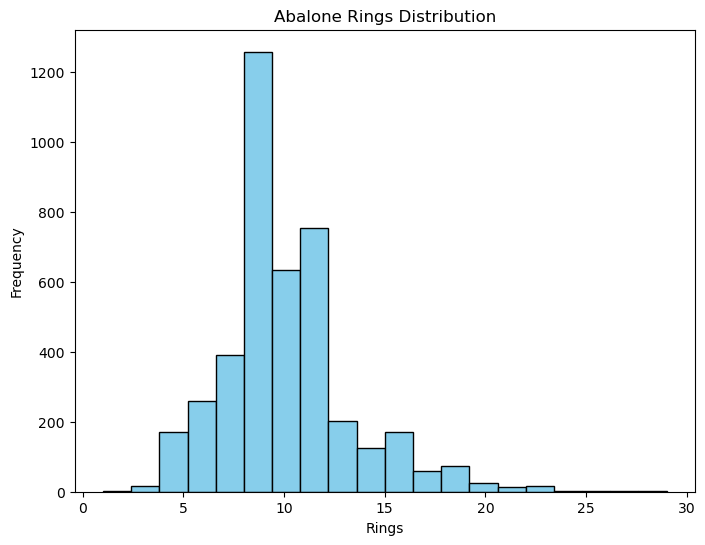

In [9]:
plt.figure(figsize=(8, 6))

plt.hist(data['Rings'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Abalone Rings Distribution')

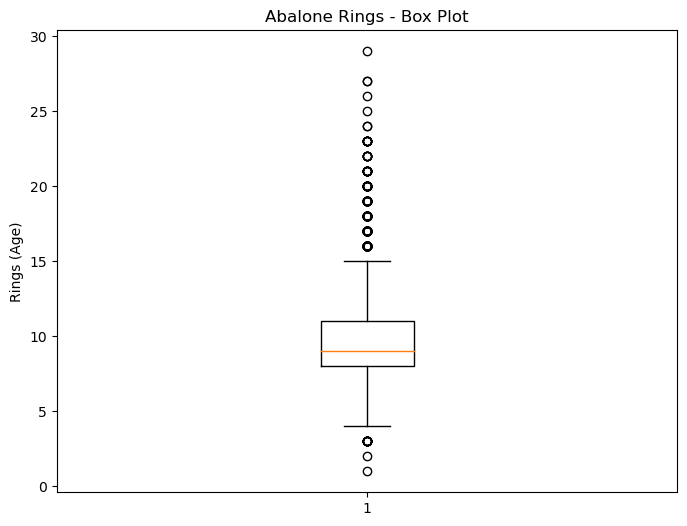

In [10]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Rings'])
plt.ylabel('Rings (Age)')
plt.title('Abalone Rings - Box Plot')

plt.show()

In [11]:
count_over_25 = data[data['Rings'] >= 20].shape[0]

print("Rings 컬럼의 값이 20 이상인 데이터의 개수:", count_over_25)

Rings 컬럼의 값이 20 이상인 데이터의 개수: 62


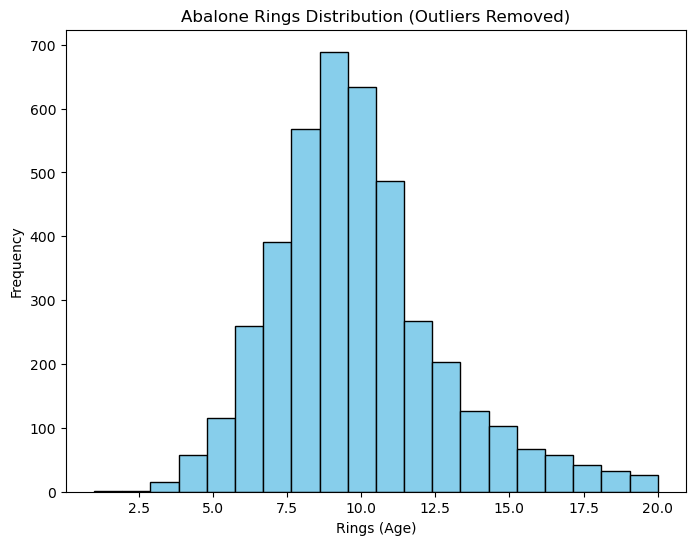

In [12]:
filtered_data = data[data['Rings'] <= 20]

# 히스토그램을 사용하여 'rings'의 분포를 확인합니다.
plt.figure(figsize=(8, 6))
plt.hist(filtered_data['Rings'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rings (Age)')
plt.ylabel('Frequency')
plt.title('Abalone Rings Distribution (Outliers Removed)')

plt.show()

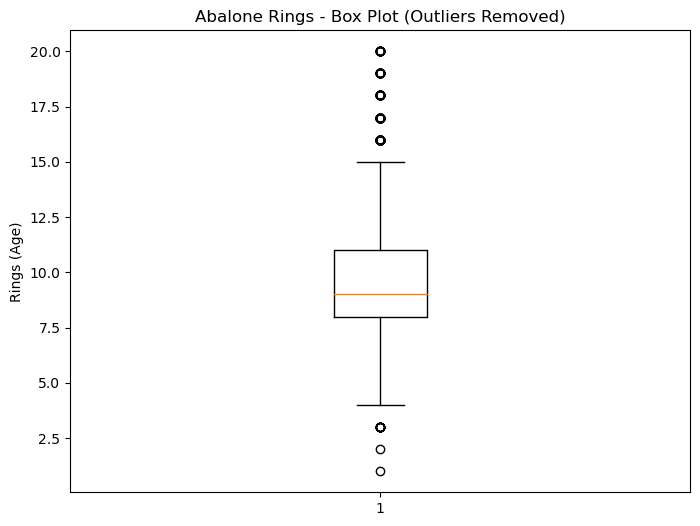

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['Rings'])
plt.ylabel('Rings (Age)')
plt.title('Abalone Rings - Box Plot (Outliers Removed)')

plt.show()

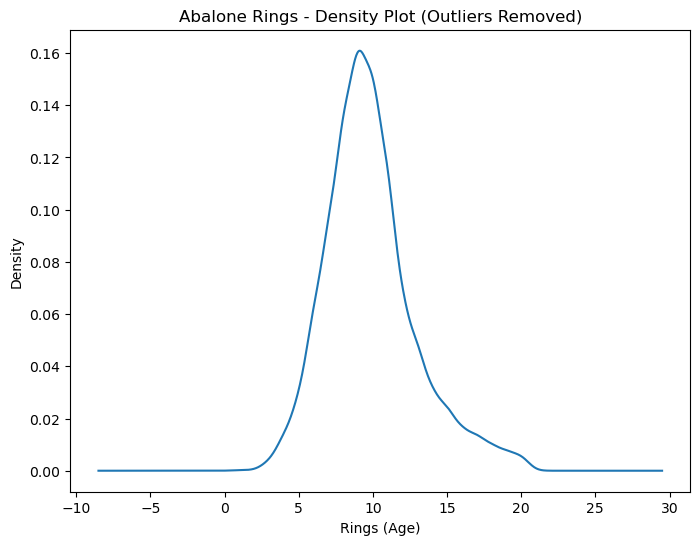

In [14]:
plt.figure(figsize=(8, 6))
filtered_data['Rings'].plot.kde()
plt.xlabel('Rings (Age)')
plt.title('Abalone Rings - Density Plot (Outliers Removed)')

plt.show()

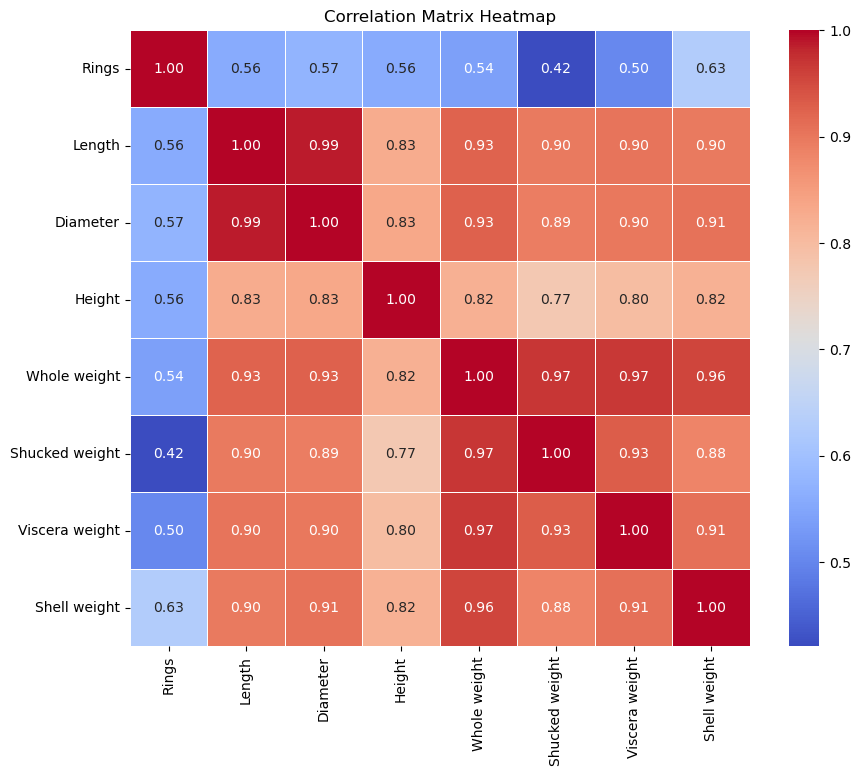

In [15]:
correlation_matrix = data[['Rings', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']].corr()

# heatmap으로 상관관계를 시각화합니다.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

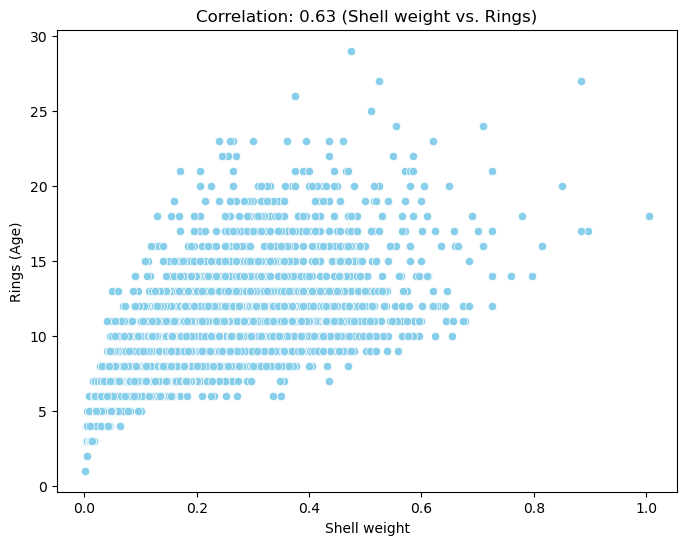

In [16]:
correlation = data['Rings'].corr(data['Shell weight'])

# scatter plot을 사용하여 두 변수 간의 상관관계를 시각화합니다.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Shell weight', y='Rings', color='skyblue')
plt.xlabel('Shell weight')
plt.ylabel('Rings (Age)')
plt.title(f"Correlation: {correlation:.2f} (Shell weight vs. Rings)")
plt.show()

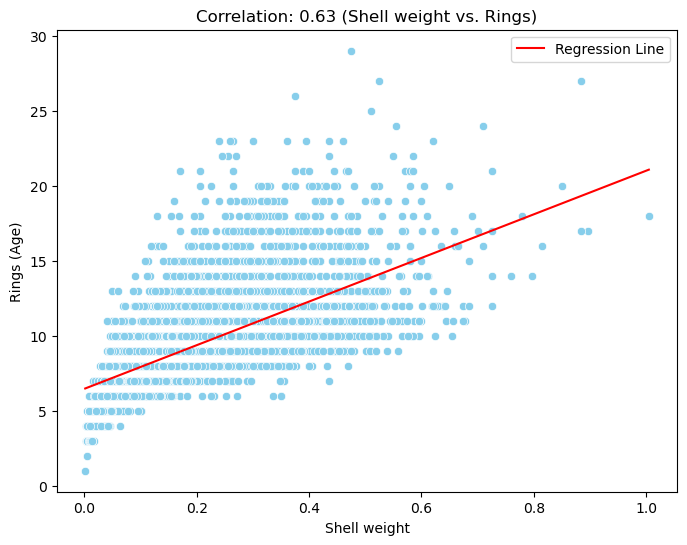

In [17]:
correlation = data['Rings'].corr(data['Shell weight'])

# scatter plot을 사용하여 두 변수 간의 상관관계를 시각화합니다.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Shell weight', y='Rings', color='skyblue')
plt.xlabel('Shell weight')
plt.ylabel('Rings (Age)')
plt.title(f"Correlation: {correlation:.2f} (Shell weight vs. Rings)")

# 선형 회귀 모델을 적합시키고 선을 그립니다.
slope, intercept, r_value, p_value, std_err = linregress(data['Shell weight'], data['Rings'])
x_values = np.linspace(data['Shell weight'].min(), data['Shell weight'].max(), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.legend()
plt.show()

In [18]:
# EDA진행

c_data = data[data['Rings']<20]

In [19]:
c_data.reset_index(drop=True, inplace=True)

In [20]:
c_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4110,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4111,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4112,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4113,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [21]:
incorrect_whole_weight = c_data[c_data['Whole weight'] < (c_data['Shucked weight'] + c_data['Viscera weight'] + c_data['Shell weight'])]

incorrect_whole_weight.value_counts()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight  Rings
F    0.375   0.290     0.080   0.2820        0.1405          0.0725          0.0800        7        1
I    0.535   0.400     0.135   0.7750        0.3680          0.2080          0.2055        8        1
     0.495   0.380     0.145   0.5000        0.2050          0.1480          0.1505        8        1
     0.500   0.380     0.135   0.5285        0.2260          0.1230          0.2090        8        1
             0.390     0.125   0.5830        0.2940          0.1320          0.1605        8        1
                                                                                                   ..
     0.310   0.225     0.070   0.1055        0.4350          0.0150          0.0400        5        1
     0.315   0.210     0.060   0.1250        0.0600          0.0375          0.0350        5        1
             0.230     0.000   0.1340        0.0575          0.0285          0.3505    

In [22]:
# 'Whole weight'가 'Shucked weight', 'Viscera weight', 'Shell weight'를 더한 값보다 크거나 같은 데이터를 'c_data'에 저장합니다.
c_data = c_data[c_data['Whole weight'] >= (c_data['Shucked weight'] + c_data['Viscera weight'] + c_data['Shell weight'])]

# 'c_data' 인덱스 초기화
c_data.reset_index(drop=True, inplace=True)

In [23]:
# # 'Sex' 컬럼을 one-hot 인코딩하여 새로운 컬럼들을 생성합니다.
# encoded_sex = pd.get_dummies(c_data['Sex'], prefix='Sex')

# # 원본 데이터프레임과 인코딩된 컬럼들을 합칩니다.
# c_data = pd.concat([c_data, encoded_sex], axis=1)

# # 'Sex' 컬럼과 인코딩된 컬럼들을 제거합니다.
# c_data.drop('Sex', axis=1, inplace=True)

In [24]:
# # True와 False를 1과 0으로 변환합니다.
# c_data['Sex_M'] = c_data['Sex_M'].astype(int)
# c_data['Sex_F'] = c_data['Sex_F'].astype(int)
# c_data['Sex_I'] = c_data['Sex_I'].astype(int)

# # 결과 확인
# c_data.reset_index(drop=True, inplace=True)

In [25]:
c_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
3955,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
3956,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
3957,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
3958,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [26]:
# correlation_matrix = c_data.corr()

# # heatmap으로 상관관계를 시각화합니다.
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix Heatmap - c_data')
# plt.show()

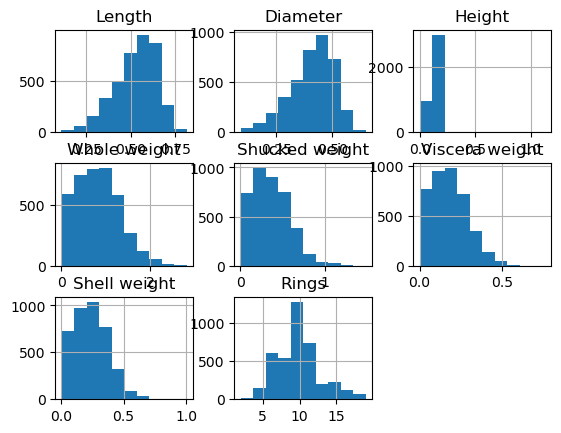

In [27]:
c_data.hist(bins=10)
plt.show()

In [28]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score

# # 스탠다드 스케일링을 수행한 후의 데이터를 사용합니다.
# X = c_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M', 'Rings_scaled']]
# y = c_data['Rings']

# # 데이터를 학습용(train)과 테스트용(test)으로 나눕니다. (8:2 비율로 분할)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 랜덤 포레스트 회귀 모델을 생성하고 학습합니다.
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # 테스트 데이터로 예측을 수행합니다.
# y_pred = model.predict(X_test)

# # 모델의 성능 평가
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)

In [29]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# # 특성 변수(X)와 타겟 변수(y)를 설정합니다.
# X = c_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']]
# y = c_data['Rings']

# # 데이터를 학습용(train)과 테스트용(test)으로 나눕니다. (8:2 비율로 분할)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 랜덤 포레스트 회귀 모델을 생성하고 학습합니다.
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # 테스트 데이터로 예측을 수행합니다.
# y_pred = model.predict(X_test)

# # 모델의 성능 평가
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)

# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)
# print("Mean Absolute Error (MAE):", mae)
# print("Root Mean Squared Error (RMSE):", rmse)

In [30]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score

# # 스탠다드 스케일링을 수행한 후의 데이터를 사용합니다.
# X = c_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']]
# y = c_data['Rings']

# # 데이터를 학습용(train)과 테스트용(test)으로 나눕니다. (8:2 비율로 분할)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 스탠다드 스케일링을 수행합니다.
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 선형 회귀 모델 생성
# model = LinearRegression()

# # 모델 학습
# model.fit(X_train_scaled, y_train)

# # 테스트 데이터로 예측
# y_pred = model.predict(X_test_scaled)

# # 모델 평가
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)


In [31]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 후보들을 지정합니다.
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # RandomForestRegressor 모델 생성
# model = RandomForestRegressor(random_state=42)

# # GridSearchCV를 사용하여 모델 튜닝 및 최적의 하이퍼파라미터 찾기
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 평가 점수 출력
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [32]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # 하이퍼파라미터 후보들을 지정합니다.
# param_dist = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # RandomForestRegressor 모델 생성
# model = RandomForestRegressor(random_state=42)

# # RandomizedSearchCV를 사용하여 모델 튜닝 및 최적의 하이퍼파라미터 찾기
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
# random_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 평가 점수 출력
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)


In [33]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam

# # 스탠다드 스케일링을 수행한 후의 데이터를 사용합니다.
# X = c_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']]
# y = c_data['Rings']

# # 데이터를 학습용(train)과 테스트용(test)으로 나눕니다. (8:2 비율로 분할)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 스탠다드 스케일링을 수행합니다.
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 딥러닝 모델 구성
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1))

# # 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# # 모델 학습
# history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=100, validation_split=0.1)

# # 모델 평가
# y_pred = model.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)

In [34]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error, r2_score

# # 데이터 준비
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 모델 구성
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))  # 추가 층
# model.add(Dense(1))

# # 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# # 모델 학습
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# # 모델 평가 - 손실 (loss)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error (MSE):", mse)

# # 모델 평가 - 정확도 (R-squared)
# r2 = r2_score(y_test, y_pred)
# print("R-squared (R2):", r2)

In [35]:
c_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
3955,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
3956,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
3957,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
3958,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [36]:
c_data.to_csv('eda_data.csv', index=False)

In [37]:
# import joblib
# joblib.dump(model,'abalone_model.pkl')